In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base = pd.read_csv('../data/microdados_enem2021v3.csv')
pd.set_option('display.max_rows', 100)
base.head()

,TP_FAIXA_ETARIA,TP_ESCOLA,RENDA_FAM,COMPUTADOR,INTERNET,NOTA
0,3,2,1,1,1,média
1,2,2,2,1,1,média
2,8,2,1,0,1,baixa
3,4,2,1,0,1,baixa
4,2,2,1,1,1,média


In [3]:
base['TP_FAIXA_ETARIA'].replace({1:'<17',2:'17',3:'18',4:'19',5:'20', 
                                 6:'21',7:'22',8:'23',9:'24',10:'25', 
                                 11:'26..30',12:'31..35',13:'36..40',
                                 14:'41..45',15:'46..50',16:'51..55',
                                 17:'56..60',18:'61..65',19:'66..70',
                                 20:'>70'}, inplace = True)

In [4]:
base['TP_ESCOLA'].replace({2:'PUBLICA', 3:'PRIVADA'}, inplace = True)

In [5]:
base['RENDA_FAM'].replace({0:'A',1:'B',2:'C',3:'D',4:'E',
                           5:'F',6:'G',7:'H',8:'I',9:'J',
                           10:'K',11:'L',12:'M',13:'N',
                           14:'O',15:'P',16:'Q'}, 
                          inplace = True)

In [6]:
base['COMPUTADOR'].replace({0:'NAO',1:'SIM',2:'SIM',3:'SIM',4:'SIM',5:'SIM'}, inplace = True)

In [7]:
base['INTERNET'].replace({0:'NAO',1:'SIM'}, inplace = True)

In [8]:
base['NOTA'].replace({'baixa':'BAIXA','média':'MÉDIA','alta':'ALTA'}, inplace = True)

In [9]:
base.head()

,TP_FAIXA_ETARIA,TP_ESCOLA,RENDA_FAM,COMPUTADOR,INTERNET,NOTA
0,18,PUBLICA,B,SIM,SIM,MÉDIA
1,17,PUBLICA,C,SIM,SIM,MÉDIA
2,23,PUBLICA,B,NAO,SIM,BAIXA
3,19,PUBLICA,B,NAO,SIM,BAIXA
4,17,PUBLICA,B,SIM,SIM,MÉDIA


In [17]:
def graphicGenerator(index, figsize, style, titleA, titleB, yLabel, xLabel):
    
    print(base.groupby([index, 'NOTA']).size())
    print('--------------------------')

    if index == 'TP_FAIXA_ETARIA':
        # Gráfico A
        plt.figure(figsize = figsize)
        sns.set_theme(style = style)
        top_10 = base[index].value_counts()[:10].index
        sns.countplot(x = index, order = top_10, data = base, linewidth = 0)
        plt.title(titleA)
        plt.ylabel(yLabel)
        plt.xlabel(xLabel)
        plt.xticks(rotation = 45)
        # Gráfico B
        plt.figure(figsize = figsize)
        sns.set_theme(style = style)
        sns.countplot(x = index, hue = 'NOTA', order = top_10, data = base, linewidth = 0)
        plt.title(titleB)
        plt.ylabel(yLabel)
        plt.xlabel(xLabel)

    elif index == 'RENDA_FAM':
        # Gráfico A
        plt.figure(figsize = figsize)
        sns.set_theme(style = style)
        top_renda = base.groupby(index).size().index
        sns.countplot(x = index, order = top_renda, data = base)
        plt.title(titleA)
        plt.ylabel(yLabel)
        plt.xlabel(xLabel)
        # Gráfico B
        plt.figure(figsize = figsize)
        sns.set_theme(style = style)
        sns.countplot(x = index, hue = 'NOTA', order = top_renda, data = base, linewidth = 0)
        plt.title(titleB)
        plt.ylabel(yLabel)
        plt.xlabel(xLabel)
        
    else:
        # Gráfico A
        plt.figure(figsize = figsize)
        sns.set_theme(style = style)
        sns.countplot(x = index, data = base)
        plt.title(titleA)
        plt.ylabel(yLabel)
        plt.xlabel(xLabel)
        # Gráfico B
        plt.figure(figsize = figsize)
        sns.set_theme(style = style)
        sns.countplot(x = index, hue = 'NOTA', data = base)
        plt.title(titleB)
        plt.ylabel(yLabel)
        plt.xlabel(xLabel)

In [11]:
indexes = pd.DataFrame(base.columns).drop([5]).rename(columns = {0:'INDEXES'})
indexes

,INDEXES
0,TP_FAIXA_ETARIA
1,TP_ESCOLA
2,RENDA_FAM
3,COMPUTADOR
4,INTERNET


INTERNET  NOTA 
NAO       ALTA        131
          BAIXA     44425
          MÉDIA     18875
SIM       ALTA      28895
          BAIXA    266423
          MÉDIA    421457
dtype: int64
--------------------------
0.21% dos participantes que NÃO possuem internet conseguiram nota alta.
4.03% dos participantes que POSSUEM internet conseguiram nota alta.


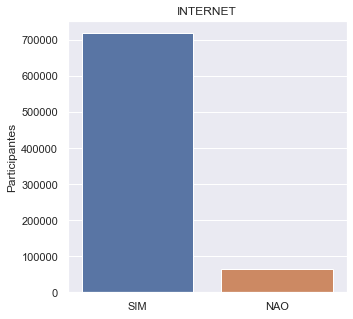

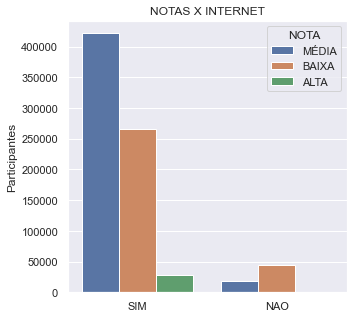

In [20]:
inputIndex = int(input('Input Index'))
index = base.columns[inputIndex]

match index:
    case 'TP_FAIXA_ETARIA':
        figsize = (10, 10)
        style = 'darkgrid'
        titleA = 'TOP 10 FAIXA ETARIA'
        titleB = 'NOTAS POR FAIXA ETÁRIA'
        yLabel = 'Participantes'
        xLabel = 'FAIXA ETÁRIA'
        graphicGenerator(index, figsize, style, titleA, titleB, yLabel, xLabel)

    case 'TP_ESCOLA':
        figsize = (5, 5)
        style = 'darkgrid'
        titleA = 'TIPO DE ESCOLA'
        titleB = 'NOTAS POR TIPO DE ESCOLA'
        yLabel = 'Participantes'
        xLabel = ''
        c1 = 20366*100/167911
        c2 = 8660*100/612295
        graphicGenerator(index, figsize, style, titleA, titleB, yLabel, xLabel)
        print(f'{c1:.2f}%', 'dos participantes de escola PRIVADA conseguiram nota alta.')
        print(f'{c2:.2f}%', 'dos participantes de escola PÚBLICA conseguiram nota alta.')
    
    case 'RENDA_FAM':
        figsize = (10, 10)
        style = 'darkgrid'
        titleA = 'RENDA FAMILIAR'
        titleB = 'NOTAS POR RENDA FAMILIAR'
        yLabel = 'Participantes'
        xLabel = 'RENDA'
        c1 = 822*100/194609
        c2 = 4080*100/14914
        graphicGenerator(index, figsize, style, titleA, titleB, yLabel, xLabel)
        print(f'{c1:.2f}%', 'dos participantes que possuem renda ATÉ R$1.100,00 conseguiram nota alta.')
        print(f'{c2:.2f}%', 'dos participantes que possuem renda ACIMA DE R$22.000,00 conseguiram nota alta.')

    case 'COMPUTADOR':
        figsize = (5, 5)
        style = 'darkgrid'
        titleA = 'COMPUTADOR'
        titleB = 'NOTAS X COMPUTADOR'
        yLabel = 'Participantes'
        xLabel = ''
        c1 = 1234*100/308287
        c2 = 27792*100/471919
        graphicGenerator(index, figsize, style, titleA, titleB, yLabel, xLabel)
        print(f'{c1:.2f}%', 'dos participantes que NÃO possuem computador conseguiram nota alta.')
        print(f'{c2:.2f}%', 'dos participantes que POSSUEM computador conseguiram nota alta.')    

    case 'INTERNET':
        figsize = (5, 5)
        style = 'darkgrid'
        titleA = 'INTERNET'
        titleB = 'NOTAS X INTERNET'
        yLabel = 'Participantes'
        xLabel = ''
        c1 = 131*100/63431
        c2 = 28895*100/716775
        graphicGenerator(index, figsize, style, titleA, titleB, yLabel, xLabel)
        print(f'{c1:.2f}%', 'dos participantes que NÃO possuem internet conseguiram nota alta.')
        print(f'{c2:.2f}%', 'dos participantes que POSSUEM internet conseguiram nota alta.')